In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [195]:
hr_bot_clear = pd.read_json("rzd/ESC_DATASET_v1.2/annotation/hr_bot_clear.json")
hr_bot_noise = pd.read_json("rzd/ESC_DATASET_v1.2/annotation/hr_bot_noise.json")
hr_bot_synt = pd.read_json("rzd/ESC_DATASET_v1.2/annotation/hr_bot_synt.json")
luga = pd.read_json("rzd/ESC_DATASET_v1.2/annotation/luga.json")

In [189]:
def get_unique_nums(df, text_start):
    texts = df['text'].to_list()
    unique_nums = {}

    for i in texts:
        if text_start in i:
            num = " ".join(i.split()[2:-1])
            if num in unique_nums.keys():
                unique_nums[num] += 1
            else:
                unique_nums[num] = 1
    return unique_nums

In [190]:
def eda_one_df(df):
    text_starts = ['осадить', 'протянуть']
    for i in text_starts: 
        print(get_unique_nums(df, i))

    count_num_labels = sum(get_unique_nums(df, 'осадить').values()) + sum(get_unique_nums(df, 'протянуть').values())
    print("количество лейблов с числом:", count_num_labels)
    print("количество лейблов без числа:", df.shape[0] - count_num_labels)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(data=df, x='label', discrete=True, ax=axes[0])
    axes[0].grid(True)

    sns.histplot(data=df, x='attribute', discrete=True, ax=axes[1])
    axes[1].grid(True)

    plt.show()

{'двадцать восемь': 8, 'восемь': 9, 'четыре': 11, 'двадцать шесть': 6, 'три': 10, 'двадцать четыре': 1, 'один': 6, 'одиннадцать': 6, 'девятнадцать': 6, 'девять': 7, 'шестнадцать': 9, 'двенадцать': 14, 'два': 10, 'семь': 9, 'семнадцать': 10, 'двадцать семь': 6, 'тринадцать': 5, 'восемнадцать': 7, 'восемьдесят шесть': 2, 'двадцать девять': 1, 'десять': 11, 'пятнадцать': 7, 'пять': 6, 'шесть': 6, 'четырнадцать': 4, 'восемьдесят два': 2, 'двадцать пять': 2, 'двадцать': 5, 'двадцать два': 1, 'восемьдесят один': 1, 'восемьдесят пять': 1, 'восемьдесят четыре': 1, 'двадцать один': 1, 'восемьдесят три': 1, 'восемьдесят девять': 1}
{'шестнадцать': 8, 'восемь': 5, 'четыре': 5, 'семнадцать': 4, 'семь': 4, 'один': 4, 'пятнадцать': 5, 'двадцать шесть': 5, 'двенадцать': 5, 'девять': 7, 'шесть': 6, 'два': 6, 'двадцать семь': 7, 'четырнадцать': 3, 'три': 6, 'десять': 5, 'тринадцать': 5, 'двадцать восемь': 5, 'двадцать': 2, 'пять': 6, 'восемнадцать': 6, 'двенадцать вагонов': 1, 'двадцать вагонов': 1, 'о

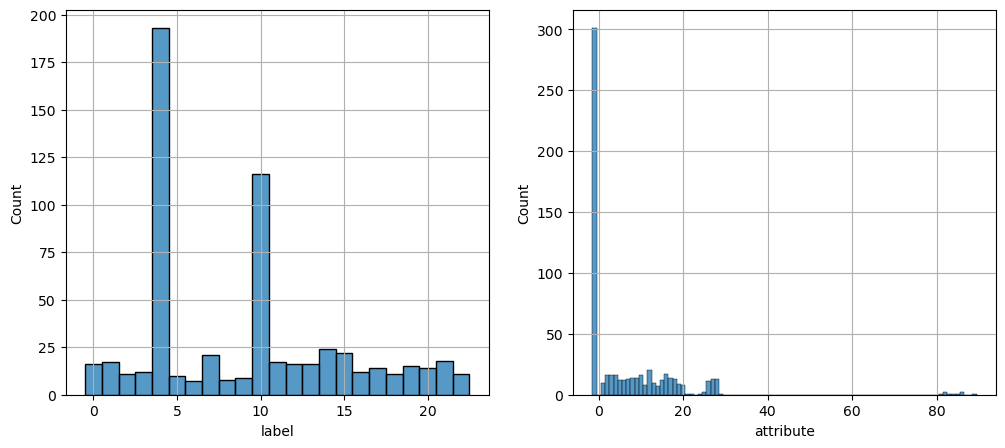

In [192]:
eda_one_df(luga)

In [9]:
# from scipy.io import wavfile
# import noisere  duce as nr
# # load data
# rate, data = wavfile.read("ржд 1/ESC_DATASET_v1.2/hr_bot_synt/3a0cb44f-76ff-11ee-844c-c09bf4619c03_1.wav")
# # perform noise reduction
# reduced_noise = nr.reduce_noise(y=data, sr=rate)
# wavfile.write("mywav_reduced_noise.wav", rate, reduced_noise)